In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [11]:
# 경제 지표 데이터
economic_data_dict = {
    'Africa': pd.DataFrame({
        '연도': [2023, 2024, 2025],
        'GDP': [2.3, 2.8, 2.5],
        '소비자 신뢰지수': [78, 82, 80],
        '환율': [1.1, 1.2, 1.15]
    }),
    'Asia Pacific': pd.DataFrame({
        '연도': [2023, 2024, 2025],
        'GDP': [4.2, 4.7, 4.5],
        '소비자 신뢰지수': [92, 95, 93],
        '환율': [6.7, 7.0, 6.9]
    }),
    'Canada': pd.DataFrame({
        '연도': [2023, 2024, 2025],
        'GDP': [1.9, 2.3, 2.1],
        '소비자 신뢰지수': [88, 92, 90],
        '환율': [1.35, 1.40, 1.37]
    }),
    'China': pd.DataFrame({
        '연도': [2023, 2024, 2025],
        'GDP': [5.2, 5.7, 5.5],
        '소비자 신뢰지수': [102, 105, 103],
        '환율': [6.9, 7.1, 7.0]
    }),
    'Eastern Europe': pd.DataFrame({
        '연도': [2023, 2024, 2025],
        'GDP': [2.5, 3.1, 2.8],
        '소비자 신뢰지수': [80, 85, 83],
        '환율': [1.2, 1.3, 1.25]
    }),
    'Europe': pd.DataFrame({
        '연도': [2023, 2024, 2025],
        'GDP': [1.6, 2.1, 1.9],
        '소비자 신뢰지수': [85, 90, 88],
        '환율': [0.95, 1.00, 0.97]
    }),
    'India': pd.DataFrame({
        '연도': [2023, 2024, 2025],
        'GDP': [6.8, 7.3, 7.0],
        '소비자 신뢰지수': [93, 96, 94],
        '환율': [84, 86, 85]
    }),
    'Latin America': pd.DataFrame({
        '연도': [2023, 2024, 2025],
        'GDP': [2.2, 2.7, 2.5],
        '소비자 신뢰지수': [75, 80, 78],
        '환율': [1.2, 1.3, 1.25]
    }),
    'Mexico': pd.DataFrame({
        '연도': [2023, 2024, 2025],
        'GDP': [2.5, 3.0, 2.8],
        '소비자 신뢰지수': [80, 85, 83],
        '환율': [22, 23, 22.5]
    }),
    'Middle East': pd.DataFrame({
        '연도': [2023, 2024, 2025],
        'GDP': [3.2, 3.7, 3.5],
        '소비자 신뢰지수': [85, 90, 88],
        '환율': [4.0, 4.2, 4.1]
    }),
    'U.S.A': pd.DataFrame({
        '연도': [2023, 2024, 2025],
        'GDP': [2.2, 2.7, 2.5],
        '소비자 신뢰지수': [95, 100, 98],
        '환율': [1.05, 1.10, 1.075]
    })
}

In [12]:
car_sales_africa = pd.read_csv('기아_해외현지판매_전처리.CSV')

In [13]:
# Africa 지역의 Bongo / Frontier 판매량 데이터를 추출합니다.
bongo_sales = car_sales_africa[(car_sales_africa['국가명'] == 'Africa') & 
                              (car_sales_africa['차종'] == 'Bongo / Frontier') & 
                              (car_sales_africa['공장명(국가)'] == 'Korea Plants')]

In [14]:
bongo_sales[['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월']] = bongo_sales[['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월']].apply(pd.to_numeric, errors='coerce')

C:\Users\USER\AppData\Local\Temp\ipykernel_18320\1487895690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bongo_sales[['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월']] = bongo_sales[['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월']].apply(pd.to_numeric, errors='coerce')


In [15]:
# 판매량 데이터를 연도별로 합산합니다.
bongo_sales_yearly = bongo_sales[['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월']].sum(axis=1)

In [16]:
# 연도별 판매량 DataFrame를 생성합니다.
bongo_sales_df = pd.DataFrame({
    '연도': bongo_sales['연도'].unique(),
    'Bongo / Frontier 판매량': bongo_sales_yearly.values
})

In [17]:
# Carens MPV 판매량 데이터를 추출합니다.
carens_sales = car_sales_africa[(car_sales_africa['국가명'] == 'Africa') & 
                               (car_sales_africa['차종'] == 'Carens MPV') & 
                               (car_sales_africa['공장명(국가)'] == 'India Plant')]

In [19]:
# 판매량 데이터를 숫자로 변환합니다.
carens_sales[['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월']] = carens_sales[['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월']].apply(pd.to_numeric, errors='coerce')

C:\Users\USER\AppData\Local\Temp\ipykernel_18320\2774004515.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  carens_sales[['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월']] = carens_sales[['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월']].apply(pd.to_numeric, errors='coerce')


In [20]:
# 판매량 데이터를 연도별로 합산합니다.
carens_sales_yearly = carens_sales[['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월']].sum(axis=1)

In [23]:
# 연도별 판매량 DataFrame를 생성합니다.
carens_sales_df = pd.DataFrame({
    '연도': carens_sales['연도'].unique(),
    'Carens MPV 판매량': carens_sales_yearly.values
})

In [25]:
# Carnival / Sedona 판매량 데이터를 추출합니다.
carnival_sales = car_sales_africa[(car_sales_africa['국가명'] == 'Africa') & 
                                 (car_sales_africa['차종'] == 'Carnival / Sedona') & 
                                 (car_sales_africa['공장명(국가)'] == 'Korea Plants')]

In [26]:
# 판매량 데이터를 숫자로 변환합니다.
carnival_sales[['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월']] = carnival_sales[['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월']].apply(pd.to_numeric, errors='coerce')

C:\Users\USER\AppData\Local\Temp\ipykernel_18320\3999680211.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  carnival_sales[['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월']] = carnival_sales[['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월']].apply(pd.to_numeric, errors='coerce')


In [27]:
# 판매량 데이터를 연도별로 합산합니다.
carnival_sales_yearly = carnival_sales[['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월']].sum(axis=1)

In [28]:
# 연도별 판매량을 DataFrame으로 만듭니다.
carnival_sales_df = pd.DataFrame({
    '연도': carnival_sales['연도'].unique(),
    'Carnival / Sedona 판매량': carnival_sales_yearly.values
})


In [29]:
# 모든 데이터를 하나의 DataFrame으로 결합합니다.
analysis_data = pd.merge(economic_data_dict['Africa'], bongo_sales_df, on='연도')
analysis_data = pd.merge(analysis_data, carens_sales_df, on='연도')
analysis_data = pd.merge(analysis_data, carnival_sales_df, on='연도')


In [30]:
# 상관계수 계산
correlation_matrix = analysis_data.corr()
print(correlation_matrix)

                        연도  GDP  소비자 신뢰지수   환율  Bongo / Frontier 판매량  \
연도                     1.0 -1.0      -1.0 -1.0                  -1.0   
GDP                   -1.0  1.0       1.0  1.0                   1.0   
소비자 신뢰지수              -1.0  1.0       1.0  1.0                   1.0   
환율                    -1.0  1.0       1.0  1.0                   1.0   
Bongo / Frontier 판매량  -1.0  1.0       1.0  1.0                   1.0   
Carens MPV 판매량        -1.0  1.0       1.0  1.0                   1.0   
Carnival / Sedona 판매량 -1.0  1.0       1.0  1.0                   1.0   

                       Carens MPV 판매량  Carnival / Sedona 판매량  
연도                               -1.0                   -1.0  
GDP                               1.0                    1.0  
소비자 신뢰지수                          1.0                    1.0  
환율                                1.0                    1.0  
Bongo / Frontier 판매량              1.0                    1.0  
Carens MPV 판매량                    1.0        

In [31]:
# 선형 회귀 모델을 통해 GDP와 Bongo / Frontier 판매량 간의 관계를 분석합니다.
X = analysis_data[['GDP']]
y = analysis_data['Bongo / Frontier 판매량']

In [32]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [33]:
print(f"회귀 계수: {model.coef_[0]}")
print(f"절편: {model.intercept_}")


회귀 계수: 6166.66666666667
절편: -15299.666666666673


c:\Users\USER\anaconda3\envs\hi\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54032 (\N{HANGUL SYLLABLE PAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\envs\hi\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\envs\hi\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\envs\hi\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50752 (\N{HANGUL SYLLABLE WA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\envs\hi\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) DejaVu Sa

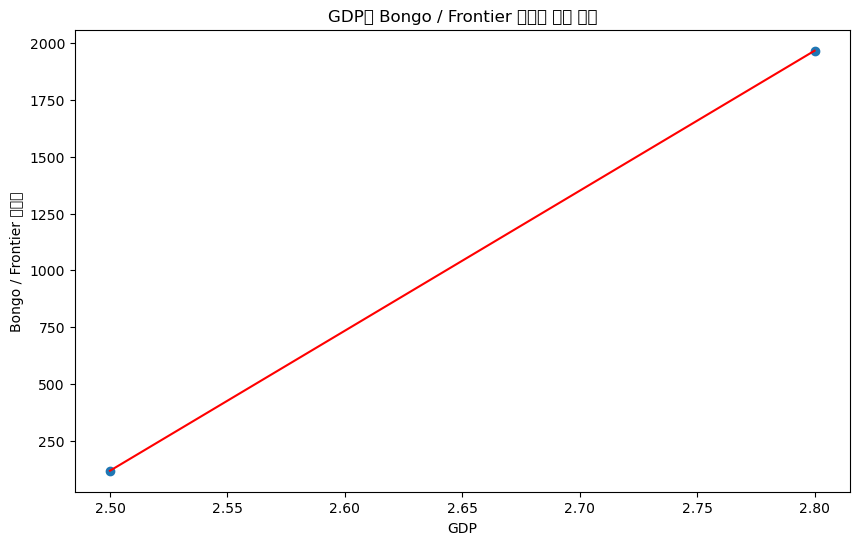

In [34]:
# 시각화
plt.figure(figsize=(10, 6))
plt.scatter(X, y)
plt.plot(X, model.predict(X), color='red')
plt.xlabel('GDP')
plt.ylabel('Bongo / Frontier 판매량')
plt.title('GDP와 Bongo / Frontier 판매량 간의 관계')
plt.show()